In [1]:
# Visualizing what Convnets learn

In [2]:
from keras.models import load_model

2023-02-07 21:32:18.629925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 21:32:22.373867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-07 21:32:22.373982: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-07 21:32:28.746337: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
model = load_model('cats_and_dogs_small_2.h5') # We shall use the pretrained model for cats and dogs classification
model.summary()

2023-02-07 21:33:00.400902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 21:33:00.401712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-07 21:33:00.401802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-07 21:33:00.401873: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-07 21:33:00.401941: W tensorflow/c

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [10]:
# Preprocessing a sisngle image

In [11]:
img_path = '/home/amos/Desktop/Models/cats_and_dogs_small/test/cats/cat.1607.jpg'


In [14]:
#from keras.preprocessing import image # seems to have deprecated. Does not have load_img function
import keras.utils as image
import numpy as np

In [15]:
img = image.load_img(img_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255. # the model was trained on inputs that had been reduced by 255
print(img_tensor.shape)

(1, 150, 150, 3)


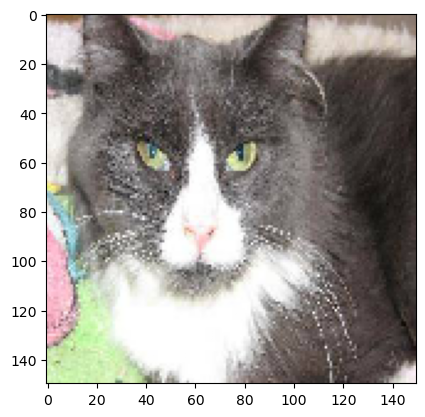

In [16]:
# Display the picture
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

# To extract  the feature maps we want to look at:
   ## we shall create a keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers

In [17]:
from keras import models

In [19]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs) # we are defining a Keras Model. 

In [20]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 1s/step


In [22]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [23]:
## Lets visualize the fourth channel of the activation of the first layer of the original model

In [24]:
import matplotlib.pyplot as plt

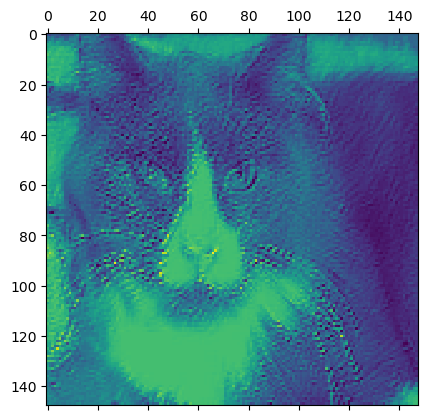

In [25]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap = 'viridis')

In [26]:
# How about the 7th channel

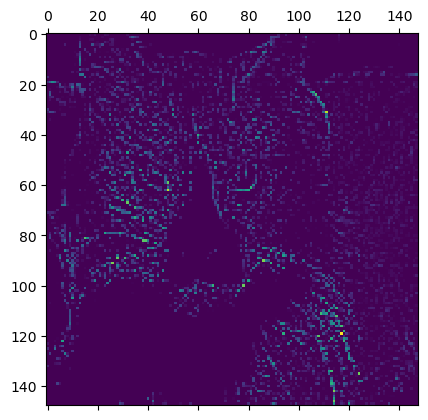

In [27]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap = 'viridis')

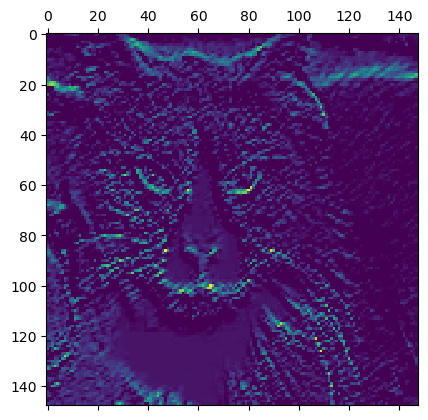

In [28]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap = 'viridis')

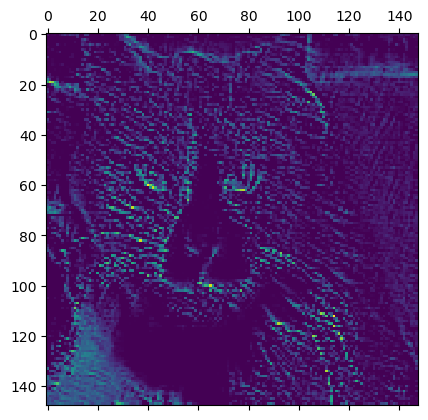

In [29]:
plt.matshow(first_layer_activation[0, :, :, 12], cmap = 'viridis')

In [30]:
# Lets visualize every channel in every intermediate activation


/tmp/ipykernel_4294/1096250581.py:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


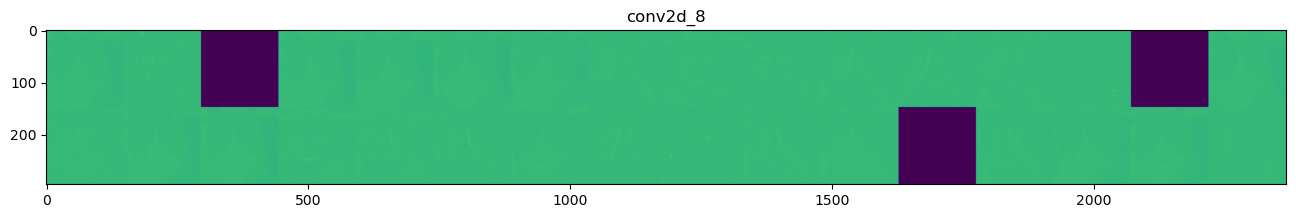

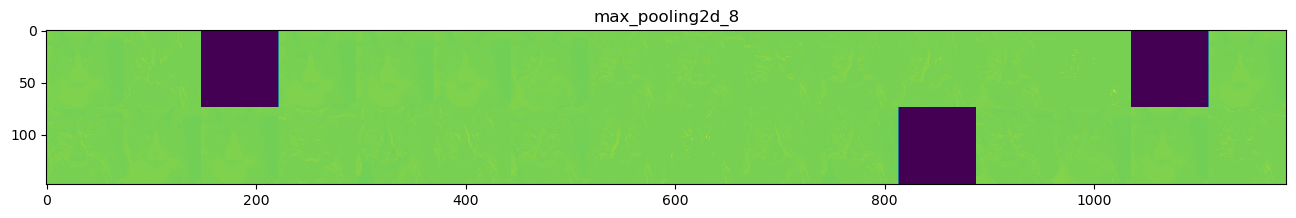

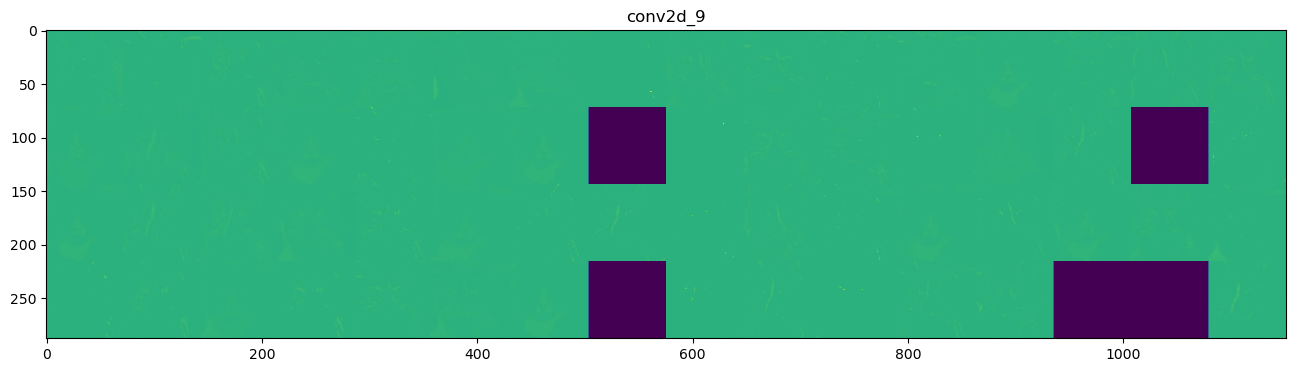

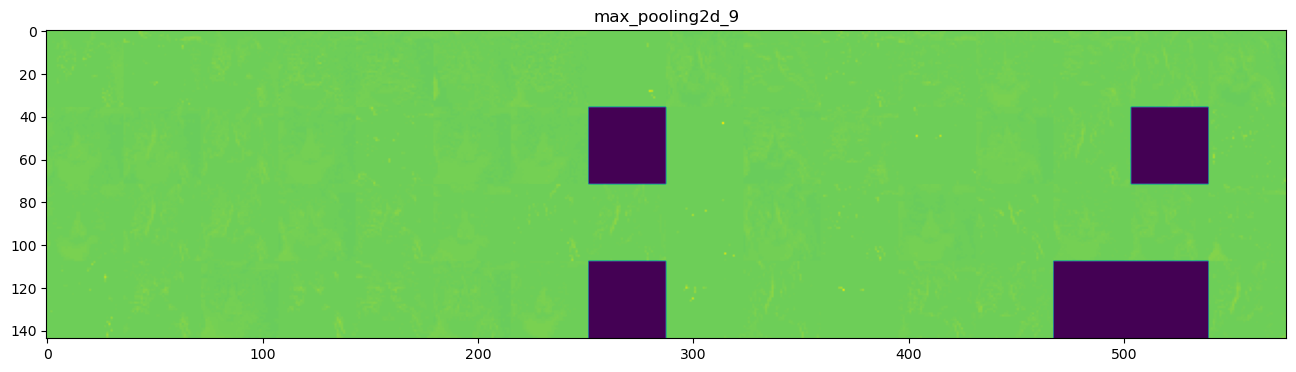

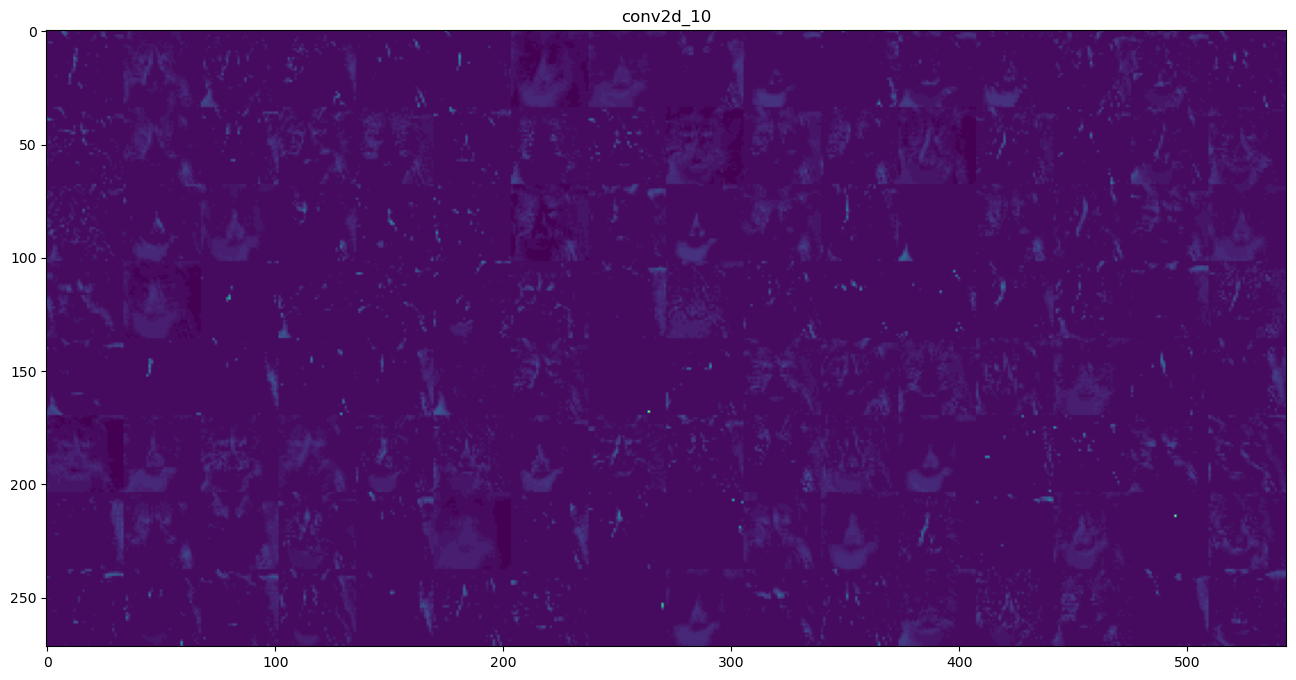

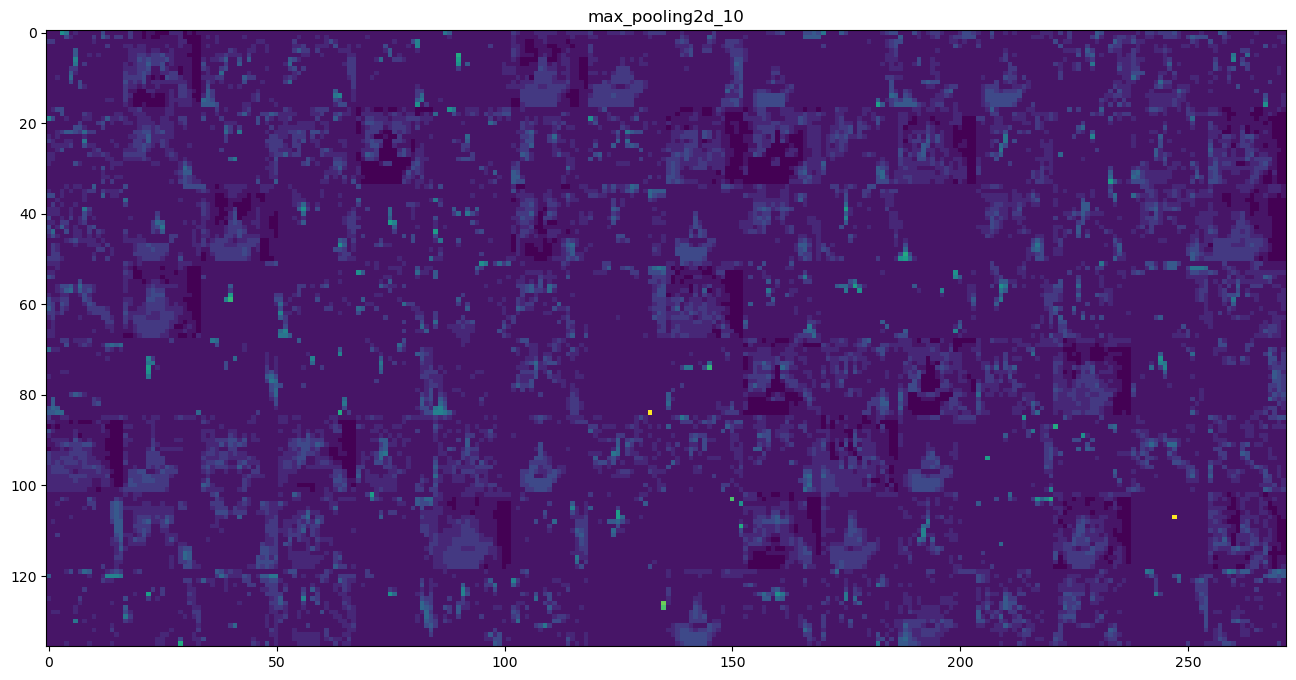

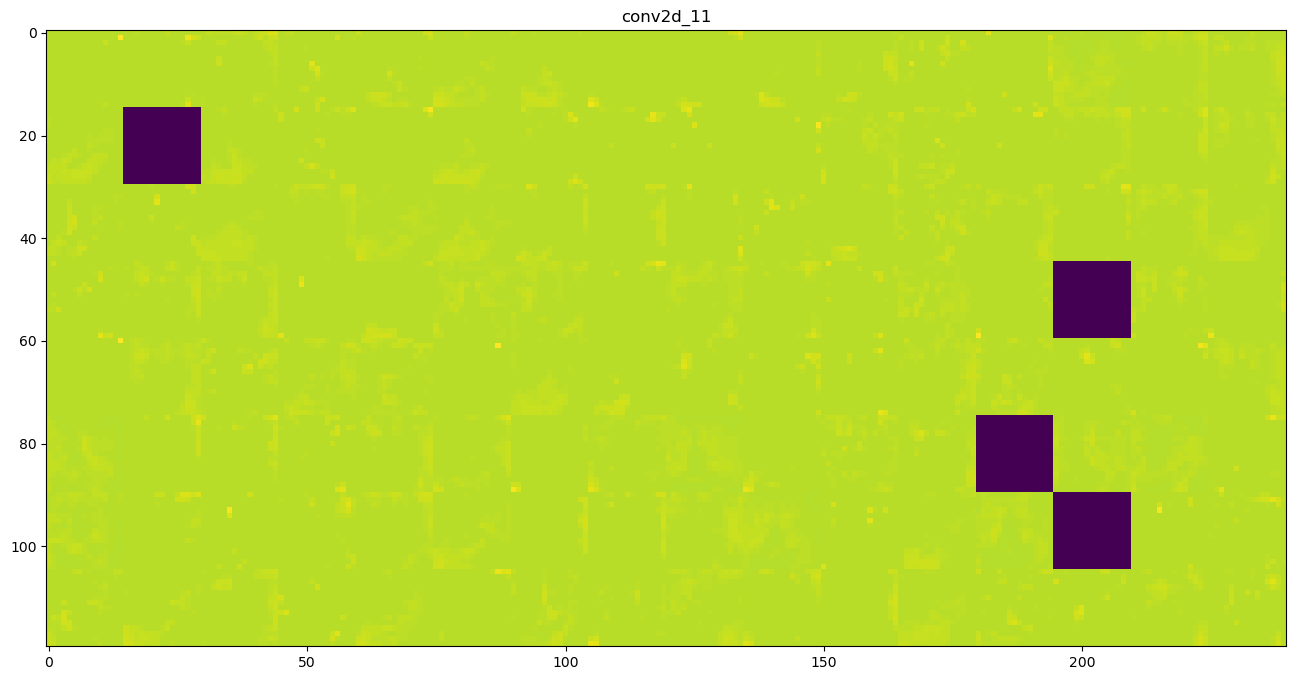

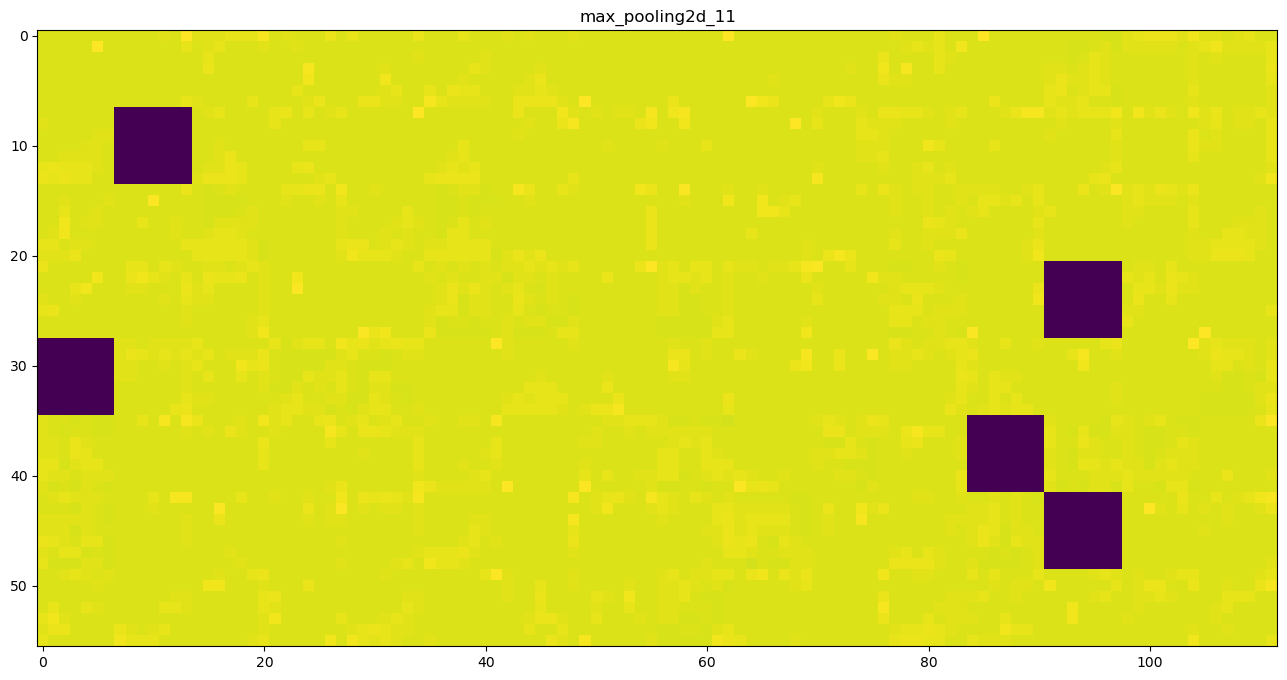

In [33]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    size = layer_activation.shape[1]
    n_features = layer_activation.shape[-1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image /= channel_image.std()
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')